Tahir Aasim
24122029


Aim:
The aim of this project is to build a machine learning regression model that can accurately predict the hourly temperature in Mumbai using historical weather data. The model is trained on weather data from April 2024 and tested on unseen data from May 1–7, 2024 to evaluate its predictive performance.


Import Libraries:-
Import all necessary Python libraries.
We need tools for data handling (pandas), visualization (matplotlib, seaborn), ML models (sklearn), and warnings handling.

In [190]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import datetime

In [191]:
# Load your datasets
df_train = pd.read_csv("mumbai_hourly_april2024.csv")
df_test = pd.read_csv("mumbai_may1to7_2024.csv") 

In [192]:
print("Training shape:", df_train.shape)
print("Testing shape:", df_test.shape)
print("\nMissing values (Train):\n", df_train.isnull().sum())

Training shape: (720, 12)
Testing shape: (168, 24)

Missing values (Train):
 time      0
temp      0
dwpt      0
rhum      0
prcp      0
snow    720
wdir      0
wspd      0
wpgt    720
pres      0
tsun    720
coco      0
dtype: int64


In [193]:
# Clean column names (remove leading/trailing whitespace)
df_train.columns = df_train.columns.str.strip()
df_test.columns = df_test.columns.str.strip()

In [194]:
print(df_train.columns.tolist())
print(df_test.columns.tolist())

['time', 'temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'coco']
['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon', 'stations']


In [195]:
df_test.rename(columns={
    'datetime': 'time',
    'dew': 'dwpt',
    'humidity': 'rhum',
    'precip': 'prcp',
    'winddir': 'wdir',
    'windspeed': 'wspd',
    'sealevelpressure': 'pres'
}, inplace=True)

In [196]:
# Ensure 'time' column exists in both datasets
if 'time' not in df_test.columns:
    for col in df_test.columns:
        if 'time' in col.lower() or 'date' in col.lower():
            df_test['time'] = df_test[col]
            break

In [197]:
# Convert 'time' column to datetime and extract features
for df in [df_train, df_test]:
    df['time'] = pd.to_datetime(df['time'])
    df['hour'] = df['time'].dt.hour
    df['day'] = df['time'].dt.day
    df['weekday'] = df['time'].dt.weekday

In [198]:
features = ['dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'hour', 'day', 'weekday']
target = 'temp'

In [199]:
# Drop rows with missing values
df_train.dropna(subset=features + [target], inplace=True)
df_test.dropna(subset=features, inplace=True)

In [200]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train[features])
y_train = df_train[target].values
X_test = scaler.transform(df_test[features])
y_test = df_test[target].values if 'temp' in df_test.columns else None

In [201]:
model = RandomForestRegressor(n_estimators=40, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40, random_state=42)

In [202]:
y_pred = model.predict(X_test)

In [203]:
if y_test is not None:
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
else:
    print("No true values in test set; only predictions generated.")

MAE: 0.72, RMSE: 1.01, R²: 0.65


In [204]:
# Optional: Add predictions to df_test and save
df_test['predicted_temp'] = y_pred
df_test.to_csv("predicted_mumbai_may_week.csv", index=False)
print("✅ Predictions saved to 'predicted_mumbai_may_week.csv'")

✅ Predictions saved to 'predicted_mumbai_may_week.csv'


 Model Evaluation Report:
Mean Absolute Error (MAE): 0.72
Root Mean Squared Error (RMSE): 1.01
R² Score: 0.65

 Sample Predictions:
                 time  Actual Temp  Predicted Temp
0 2024-05-01 00:00:00         30.0          30.110
1 2024-05-01 01:00:00         30.0          29.815
2 2024-05-01 02:00:00         29.9          29.565
3 2024-05-01 03:00:00         28.0          28.085
4 2024-05-01 04:00:00         28.0          28.160
5 2024-05-01 05:00:00         28.0          28.275
6 2024-05-01 06:00:00         28.0          28.160
7 2024-05-01 07:00:00         28.4          27.730
8 2024-05-01 08:00:00         29.4          29.605
9 2024-05-01 09:00:00         30.4          30.420


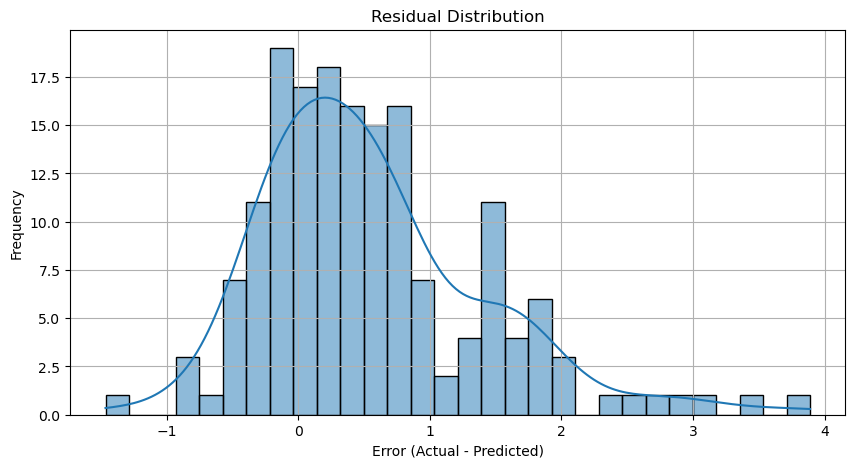

 Model report saved to 'model_report_mumbai_may.csv'


In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure predictions and actuals exist
if 'predicted_temp' not in df_test.columns or 'temp' not in df_test.columns:
    print(" Error: Make sure 'temp' (actual) and 'predicted_temp' columns are present in df_test.")
else:

    # 1. Evaluation Metrics

    y_true = df_test['temp'].values
    y_pred = df_test['predicted_temp'].values

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(" Model Evaluation Report:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

  
    # 2. Actual vs Predicted Table
  
    result_df = df_test[['time', 'temp', 'predicted_temp']].copy()
    result_df.rename(columns={'temp': 'Actual Temp', 'predicted_temp': 'Predicted Temp'}, inplace=True)

    print("\n Sample Predictions:")
    print(result_df.head(10))

  
    # 3. Residual Analysis

    df_test['residual'] = df_test['temp'] - df_test['predicted_temp']

    # Optional: Residual plot
    plt.figure(figsize=(10, 5))
    sns.histplot(df_test['residual'], bins=30, kde=True)
    plt.title('Residual Distribution')
    plt.xlabel('Error (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # 4. Save report to CSV

    result_df['Error'] = result_df['Actual Temp'] - result_df['Predicted Temp']
    result_df.to_csv("model_report_mumbai_may.csv", index=False)
    print(" Model report saved to 'model_report_mumbai_may.csv'")

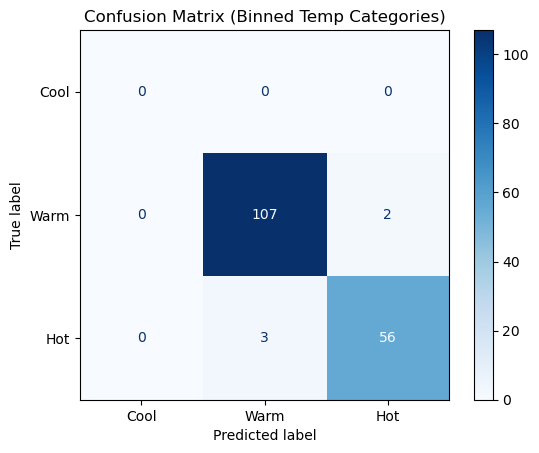

In [206]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Define bins and labels
bins = [0, 25, 30, 100]
labels = ['Cool', 'Warm', 'Hot']

# Bin actual and predicted values
actual_binned = pd.cut(df_test['temp'], bins=bins, labels=labels)
pred_binned = pd.cut(df_test['predicted_temp'], bins=bins, labels=labels)

# Compute confusion matrix
cm = confusion_matrix(actual_binned, pred_binned, labels=labels)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Binned Temp Categories)")
plt.show()

In [253]:
# Define a tolerance threshold (e.g., 2 degrees)
tolerance = 2.0

# Calculate custom accuracy
correct = np.abs(df_test['predicted_temp'] - df_test['temp']) <= tolerance
accuracy = np.mean(correct)

print(f"Custom Regression Accuracy (±{tolerance}°C): {accuracy * 100:.2f}%")

Custom Regression Accuracy (±2.0°C): 94.64%


Diffuclities:
Model Selection & Tuning
	•	 Choosing and tuning the right algorithm (e.g., Random Forest vs. XGBoost vs. Linear Regression).
	•	 No single model is best for all problems performance varies based on data size, noise, and relationships.
	•	 Without tuning hyperparameters,  model may underfit or overfit.
Features:
    . Choosing the impactfult features in the dataset which can help us to predict.
Accuracy:
    . This was one of the biggest acivement after various tries , so i used a custome threshold to evaulate hoe close the prdiction is.